In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Point import Point
from scipy.misc import imread
from matplotlib.figure import Figure
from matplotlib.backends.backend_gtk3agg import FigureCanvasGTK3Agg as FigureCanvas

In [8]:
def get_map():
    mplfigure = Figure()
    ax = mplfigure.add_subplot(111)
    ax.plot([0, 1, 100], [0, 1, 100])
#     ax.plot([self.filtered_trajectory[i].x for i in range(len(self.filtered_trajectory))],
#              [self.filtered_trajectory[i].y for i in range(len(self.filtered_trajectory))])
    img = imread('data/map.jpg')
    ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    ax.legend()
    canvas = FigureCanvas(mplfigure)
    canvas.set_size_request(400, 400)
    return canvas, mplfigure

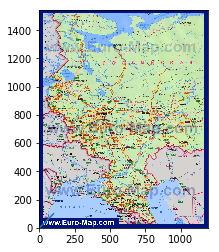

In [12]:
fig

In [ ]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_gtk3agg import FigureCanvasGTK3Agg as FigureCanvas

class Map(object):
    
    def __init__(self, trajectories=[], map_path=""):
        """
        Класс отрисовки карты и траекторий полёта самолётов и ракет.
        
        Аргументы:
            map_path: str: строка, указывающая на папку, в которой уже хранится или будет храниться сгенерированное 
                           изображение карты
            trajectories: list: список объектов класса Trajectory (или унаследованных от него классов,
                                возможно ракета/цель), которые будут динамически отрисовываться на карте,
                                каждый объект должен содержать в себе уникальное имя, тип объекта и траекторию полёта
                                на данный момент времени (последняя точка траектории, должна быть получена 
                                экстраполяцией(??), в предположении, что точки измерений приходят не очень часто э
                                то необходимо, иначе будет отставание по координате)
            
        """
        self.mplfigure = Figure()
        self.ax = self.mplfigure.add_subplot(111)
        self.map_path = map_path
        # 
        self.__img__ = None # здесь находится объект изображения карты, который генерируется функцией render_map() 
                            # или загружется из уже готового файла файла (например командой imread('data/map.jpg'))
            
    def build_map(self):
        """
        Функция, строящая карту 
        """
        for trajectory_ in self.trajectories:
            ax.plot([trajectory_.filtered_trajectory[i].x for i in range(len(trajectory_.filtered_trajectory))],
                    [trajectory_.filtered_trajectory[i].y for i in range(len(trajectory_.filtered_trajectory))]) #, 
                   #TODO: c='цвет для каждого из типов объектов или даже номеров свой')
            
            # TODO: добавить изображение объектов по типам - цель, наш самолёт, ракета и т.д.
        
        # отрисовка фонового изображения 
        ax.imshow(self.__img__, extent=[0, self.__img__.shape[1], 0, self.__img__.shape[0]]) 
        # добавление легенды карты
        ax.legend()
        
        # ХЗ ЧЁ ТУТ ВОЗВРАЩАТЬ, возвращаю пока canvas
        canvas = FigureCanvas(self.mplfigure)
        canvas.set_size_request(400, 400)
        return canvas
    
    def 

        
    def _get_map_for_coordinates(self, coordinates=[], some_parameters=None):
        """
        Это абстрактная функция получения карты по координатам, эта функция должна уметь по набору заданных точек
        генерировать / скачивать / вырезать соответствующую часть карты и класть её в self.map_path для дальнейшего
        использования.
        
        Аргументы:
            coordinates: list-like: список, состоящий из двух объектов класса Point() или двух списков 
                                    (lattitude, longitude), эти точки соответствуют например правому верхнему и
                                    левому нижнему углу изибражения. (Это только пример, возможно построение более 
                                    сложной функции сопоставления координат)
                                    
        """

# Map Downloader:

In [15]:
#!/usr/bin/python
# GoogleMapDownloader.py 
# Created by Hayden Eskriett [http://eskriett.com]
#
# A script which when given a longitude, latitude and zoom level downloads a
# high resolution google map
# Find the associated blog post at: http://blog.eskriett.com/2013/07/19/downloading-google-maps/

import urllib
import Image
import os
import math

class GoogleMapDownloader:
    """
    Класс, который генерирует google карту высокого разрешения по заданным координатам (широта и долгота 
    левого верхнего угла) и уровню увеличения
    """

    def __init__(self, lat, lng, zoom=12, map_path="maps/"):
        """
        GoogleMapDownloader Constructor
        Args:
            lat:    The latitude of the location required
            lng:    The longitude of the location required
            zoom:   The zoom level of the location required, ranges from 0 - 23
                    defaults to 12
        """
        self._lat = lat
        self._lng = lng
        self._zoom = zoom
        self.map_path  = map_path

    def getXY(self):
        """
            Generates an X, Y tile coordinate based on the latitude, longitude 
            and zoom level
            Returns:    An X,Y tile coordinate
        """
        
        tile_size = 256

        # Use a left shift to get the power of 2
        # i.e. a zoom level of 2 will have 2^2 = 4 tiles
        numTiles = 1 << self._zoom

        # Find the x_point given the longitude
        point_x = (tile_size / 2 + self._lng * tile_size / 360.0) * numTiles // tile_size

        # Convert the latitude to radians and take the sine
        sin_y = math.sin(self._lat * (math.pi / 180.0))

        # Calulate the y coorindate
        point_y = ((tile_size / 2) + 0.5 * math.log((1 + sin_y) / (1 - sin_y)) * - 
                   (tile_size / (2 * math.pi))) * numTiles // tile_size

        return int(point_x), int(point_y)

    def generateImage(self, **kwargs):
        """
            Generates an image by stitching a number of google map tiles together.
            
            Args:
                start_x:        The top-left x-tile coordinate
                start_y:        The top-left y-tile coordinate
                tile_width:     The number of tiles wide the image should be -
                                defaults to 5
                tile_height:    The number of tiles high the image should be -
                                defaults to 5
            Returns:
                A high-resolution Goole Map image.
        """

        start_x = kwargs.get('start_x', None)
        start_y = kwargs.get('start_y', None)
        tile_width = kwargs.get('tile_width', 5)
        tile_height = kwargs.get('tile_height', 5)

        # Check that we have x and y tile coordinates
        if start_x == None or start_y == None :
            start_x, start_y = self.getXY()

        # Determine the size of the image
        width, height = 256 * tile_width, 256 * tile_height

        #Create a new image of the size require
        map_img = Image.new('RGB', (width, height))

        for x in range(0, tile_width):
            for y in range(0, tile_height) :
                url = 'https://mt0.google.com/vt?x='+str(start_x+x)+'&y='+str(start_y+y)+'&z='+str(self._zoom)
                # print(url)
                current_tile = str(x) + '-' + str(y)
                urllib.urlretrieve(url, current_tile)
            
                im = Image.open(current_tile)
                map_img.paste(im, (x * 256, y * 256))
              
                os.remove(current_tile)

        return map_img

def main():
    # Create a new instance of GoogleMap Downloader
    gmd = GoogleMapDownloader(55.7522, 37.6156 , 4)

    print("The tile coorindates are {}".format(gmd.getXY()))

    try:
        # Get the high resolution image
        img = gmd.generateImage()
    except IOError:
        print("Could not generate the image - try adjusting the zoom level and checking your coordinates")
    else:
        #Save the image to disk
        img.save("maps/" + "high_resolution_image.png")
        print("The map has successfully been created")


if __name__ == '__main__': main()

The tile coorindates are (9, 5)
The map has successfully been created


# Latitude and Longitude to meters:

In [72]:
tileSize = 256
initialResolution = 2 * math.pi * 6378137 / tileSize
# 156543.03392804062 for tileSize 256 pixels
originShift = 2 * math.pi * 6378137 / 2.0
# 20037508.342789244

def LatLonToMeters( lat, lon ):
        "Converts given lat/lon in WGS84 Datum to XY in Spherical Mercator EPSG:900913"

        mx = lon * originShift / 180.0
        my = math.log( math.tan((90 + lat) * math.pi / 360.0 )) / (math.pi / 180.0)

        my = my * originShift / 180.0
        return mx, my


def MetersToPixels( mx, my, zoom):
        "Converts EPSG:900913 to pyramid pixel coordinates in given zoom level"

        res = initialResolution / 2 ** (zoom - 1)
        px = (mx + originShift) / res
        py = (my + originShift) / res
        return px, py


# Dont forget you have to convert your projection to EPSG:900913
# mx = -8237494.4864285 #-73.998672
# my = 4970354.7325767 # 40.714728
my = -8237494.4864285
mx = 4970354.7325767
zoom = 7

mx, my = MetersToPixels(mx, my, zoom)
pixel_x, pixel_y = LatLonToMeters(mx, my)

ValueError: math domain error

In [73]:
pixel_x

1194385173.9149683

# X and Y to grid:

In [66]:
initialResolution = 2 * math.pi * 6378137 / tileSize

In [67]:
initialResolution

156543.03392804097

In [62]:
def proj(lat, lon):
    """
    Вычисление проекции:
    """
    import pyproj
    
    epsg3857 = pyproj.Proj(init='epsg:3857')
    wgs84 = pyproj.Proj(init='EPSG:4326')
    
    x, y = pyproj.transform(wgs84, epsg3857, lat, lon)
    return x, y

def inverse_proj(x, y):
    """
    Вычисление обратной проекции:
    """
    import pyproj
    
    epsg3857 = pyproj.Proj(init='epsg:3857')
    wgs84 = pyproj.Proj(init='EPSG:4326')
    
    lat, lon = pyproj.transform(epsg3857, wgs84, x, y)
    return lat, lon

In [63]:
lat, lon = 45.618, -73.604

In [65]:
inverse_proj(*proj(lat, lon))

(45.61799999999999, -73.60400000000001)